# Retrieving the results of jobs at a later date

As a user, it may be useful to submit a job to Resonance, and to retrieve the results at a later date. This is especially true if you want to prepare and submit your cirucits ahead of time, so as to maximise quantum 
computation time. In this notebook we briefly outline how to accomplish this while creating a GHZ state.

## Submitting your job

This part of the code functions identically to our previous example: we set up our backend using the relevant `server_url` and `api_token`, and submit our transpiled circuit to be run.

In [1]:
from iqm.qiskit_iqm import IQMProvider, transpile_to_IQM,IQMJob
from qiskit import QuantumCircuit
from qiskit import visualization


# Adapt the server url to match the quantum computer you are using,
# for example: https://cocos.resonance.meetiqm.com/garnet
server_url = "https://cocos.resonance.meetiqm.com/<QUANTUM COMPUTER>"  
api_token = "<INSERT YOUR TOKEN>"

SHOTS = 1000

# Define quantum circuit
num_qb = 5
qc = QuantumCircuit(num_qb)

qc.h(0)
for qb in range(1, num_qb):
    qc.cx(0, qb)
qc.barrier()
qc.measure_all()

# Initialize backend
backend = IQMProvider(server_url, token=api_token).get_backend()

# Transpile circuit
qc_transpiled = transpile_to_IQM(qc, backend)
print(qc_transpiled.draw(output="text"))

# Run circuit
job_submit = backend.run(qc_transpiled, shots=SHOTS)




global phase: 3π/2
                                                                          »
   q_0: ──────────────────────────────────────────────────────────────────»
                                                                          »
   q_1: ──────────────────────────────────────────────────────────────────»
                                                                          »
   q_2: ──────────────────────────────────────────────────────────────────»
                                                                          »
   q_3: ──────────────────────────────────────────────────────────────────»
                                                                          »
   q_4: ──────────────────────────────────────────────────────────────────»
                                                                          »
   q_5: ──────────────────────────────────────────────────────────────────»
                                                                     

Your job has now been successfully submitted to Resonance, and should appear under your "latest jobs" tab on the resonance dashboard. In order to access the results of this job once it has finished running, we will need it's unique job_id; this can be found using the following command:

In [2]:
submitted_job_id=job_submit.job_id()
print(submitted_job_id)

06638d13-cdf8-758c-8000-9c51b27ee19e


Alternatively, you can click on the job under "latest jobs" to obtain the `job_id` - it is the hexidecimal string immediately after "Job" displayed as the title.

![](/img/qpu/garnet-job-detail.jpg)




## Retrieve Job

Once the job's status is marked as "Completed" in the dashboard, the results are ready to be downloaded. To do this, we define a new job with the same unique id as that which we submitted to the server. This can done via the code below, and works even if the kernel has been restarted since the job's submission:

In [ ]:
retrieved_job = IQMJob(backend,submitted_job_id)

Our newly defined job will contain all the results and metadata from the submitted and evaluated job; for example, we can plot the counts we obtained. Here are example results for the circuit defined above:

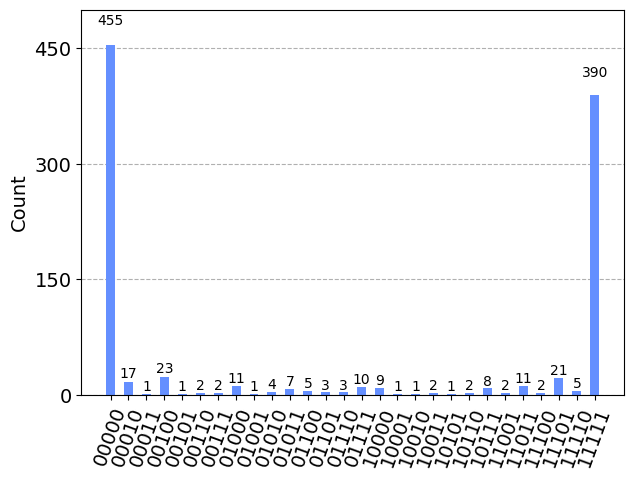

In [4]:
result_dict = retrieved_job.result().get_counts()
visualization.plot_histogram(result_dict)

🕣 Now you can go ahead and prepare your circuits ahead of your execution window and submit them when you are ready. This approach saves time by allowing you to queue your experiments and retrieve results later, making it more efficient to manage your experiments 🏎️.

In [ ]:

# Copyright 2024 IQM Quantum Computers (Thomas Cope)
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.